#CT421 Assignment 1: Genetic algorithms

Aaron Fitzpatrick - 16518423

Lorcan Creedon - 1642524

In [4]:
from random import randrange, random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Part (a) 

Below are the functions that are used throughout answering part (a).

In [30]:
# Generate p bit strings of length l
def generate_random_bits(l, p):
  max = 2**l
  fmt = f"0:0{l}b"
  return [("{" + fmt + "}").format(randrange(0, max)) for i in range(p)]

# perform crossover between a and b to create a child
def crossover(a, b):
  l = len(a)
  r = randrange(0, l)
  aa = list(a)
  aa[r:] = list(b)[r:]
  return "".join(aa)

# mutate a random bit
def mutate(b):
  r = randrange(0, len(b))
  bitarr = list(b)
  bitarr[r] = "0" if bitarr[r] == "1" else "1"
  return "".join(bitarr)


# re-useable evolve function. Takes initial population, fitness function, probability of crossover, probability of mutation & dictionary of args for fitness function
def evolve(initial_pop, eval_fitness, p_cross, p_mut, fitness_func_args = {}):
  # initialise variables
  n = 0
  fitness_change = 1
  avg_fitness = []
  pop = initial_pop
  df = pd.DataFrame(columns=["avg_fitness", "max_fitness", "fittest"])

  # enter while loop and only break when we have reached optimal solution 
  # (all fitness functions supplied should have a max of 1 which equates to a perfect solution)
  while fitness_change > 0.0001:
    # find fittest entity and calculate average & max fitness
    fitness = [eval_fitness(b, **fitness_func_args) for b in pop]
    fittest_index = fitness.index(max(fitness))
    fittest = pop[fittest_index]
    max_fitness = eval_fitness(fittest, **fitness_func_args)

    # append row to data frame
    df = df.append(pd.DataFrame({
        "avg_fitness": [sum(fitness) / len(fitness)],
        "max_fitness": [max_fitness],
        "fittest": [fittest],
    }), ignore_index = True)

    # calculate change in fitness as difference between current fitness and the fitness from 5 iterations before.
    if n > 1:
      fitness_change = abs(df["avg_fitness"].values[-1] - df["avg_fitness"].values[-2]) / df["avg_fitness"].values[-2]

    # print to console every 5 iterations
    if n % 5 == 0:
      print(f"Evolution {n}, Average Fitness: {df['avg_fitness'].values[-1]}, Fittest: {fittest} ({eval_fitness(fittest, **fitness_func_args)}), Change in avg fitness: {round(fitness_change * 100, 4)}%")

    # break if the fitness change is very small
    if fitness_change < 0.00001:
      break

    # new population begins with just the fittest
    new_pop = [fittest] 
    
    # loop through remaining population, applying one-point crossover & mutation probabilistically and adding to the new pop
    for i in range(0, len(pop)):
      # make sure not using fittest twice
      if i != fittest_index:
        b = pop[i]
        r = random()

        if p_cross > r:
          b = crossover(fittest, b)
        if p_mut > r:
          b = mutate(b)

        new_pop.append(b)

    pop = new_pop
    n+=1

  return pop, df

##(i) One-max Problem

For the one-max problem, the fitness function returns the count of 1s in the bit string. This is made easy by the count method for strings in python.


Evolution 0, Average Fitness: 9.976, Fittest: 10111100111111111001 (15), Change in avg fitness: 100%
Evolution 5, Average Fitness: 13.178, Fittest: 11111101111111111111 (19), Change in avg fitness: 6.2399%
Evolution 10, Average Fitness: 15.842, Fittest: 11111111111111111111 (20), Change in avg fitness: 2.7367%
Evolution 15, Average Fitness: 16.962, Fittest: 11111111111111111111 (20), Change in avg fitness: 1.157%
Evolution 20, Average Fitness: 17.556, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.5498%
Evolution 25, Average Fitness: 17.814, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.1462%
Evolution 30, Average Fitness: 17.936, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.134%
Evolution 35, Average Fitness: 18.084, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.2439%


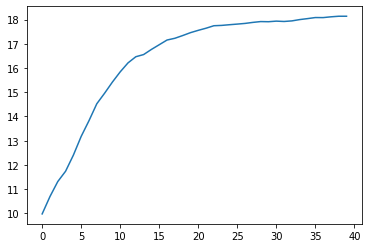

In [33]:
# fitness function for one-max problem that returns 1 if all bits are equal
one_max_fitness = lambda b: b.count("1")

l = 20
p = 500
p_mut = 0.1
p_cross = 0.3

initial_pop = generate_random_bits(l, p)

pop, df = evolve(initial_pop, one_max_fitness, p_cross, p_mut)

df["avg_fitness"].plot()

##(ii) Evolving to a target string

Changing the fitness function to return the count of matching bits was the only change that was needed to solve the target sstring problem. The same evolve fucntion as described above is used throughout.

Evolution 0, Average Fitness: 9.982, Fittest: 10001000101010000010 (16), Change in avg fitness: 100%
Evolution 5, Average Fitness: 12.51, Fittest: 10001000101010101010 (18), Change in avg fitness: 4.0246%
Evolution 10, Average Fitness: 14.236, Fittest: 10101010101010101010 (20), Change in avg fitness: 2.2995%
Evolution 15, Average Fitness: 15.894, Fittest: 10101010101010101010 (20), Change in avg fitness: 1.1326%
Evolution 20, Average Fitness: 16.922, Fittest: 10101010101010101010 (20), Change in avg fitness: 1.3658%
Evolution 25, Average Fitness: 17.442, Fittest: 10101010101010101010 (20), Change in avg fitness: 0.3683%
Evolution 30, Average Fitness: 17.792, Fittest: 10101010101010101010 (20), Change in avg fitness: 0.429%
Evolution 35, Average Fitness: 18.006, Fittest: 10101010101010101010 (20), Change in avg fitness: 0.2338%
Evolution 40, Average Fitness: 18.2, Fittest: 10101010101010101010 (20), Change in avg fitness: 0.11%
Evolution 45, Average Fitness: 18.3, Fittest: 101010101010

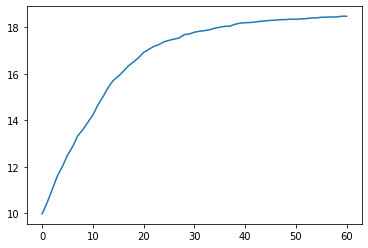

In [52]:
l = 20
p = 500
p_mut = 0.05
p_cross = 0.2

# Target String
t = "10101010101010101010"

initial_pop = generate_random_bits(l, p)
# evaluates the fitness of an entity by the number of matching bits (divided by total bits to make max 1)
target_string_fitness = lambda b: len([True for i in range(len(b)) if b[i] == t[i]])


pop, df = evolve(initial_pop, target_string_fitness, p_cross, p_mut)

df["avg_fitness"].plot()

## (iii) Deceptive Landscape

After changing the fitness function to the one specified in part (iii), it became clear that this is not a good fitness function. After experimenting with many different population sizes, mutation and crossover probabilities I couldnt get the algorithm to learn the optimal solution.

Evolution 0, Average Fitness: 10.088, Fittest: 11111111110011111111 (18), Change in avg fitness: 100%
Evolution 5, Average Fitness: 13.0, Fittest: 11111111110111111111 (19), Change in avg fitness: 3.3879%
Evolution 10, Average Fitness: 14.866, Fittest: 11111111111111111111 (20), Change in avg fitness: 2.397%
Evolution 15, Average Fitness: 15.972, Fittest: 11111111111111111111 (20), Change in avg fitness: 1.1654%
Evolution 20, Average Fitness: 16.632, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.5684%
Evolution 25, Average Fitness: 17.048, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.1763%
Evolution 30, Average Fitness: 17.318, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.0578%
Evolution 35, Average Fitness: 17.538, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.3777%
Evolution 40, Average Fitness: 17.664, Fittest: 11111111111111111111 (20), Change in avg fitness: 0.0566%
Evolution 45, Average Fitness: 17.782, Fittest: 111111

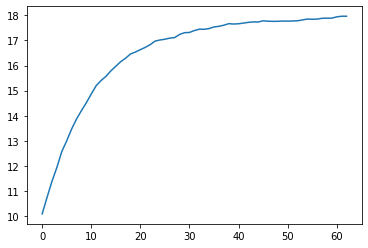

In [53]:
l = 20
p = 500
p_mut = 0.1
p_cross = 0.2

initial_pop = generate_random_bits(l, p)

def desceptive_fitness(b):
  x = b.count("1")
  return x if x > 0 else 2*len(b)

pop, df = evolve(initial_pop, desceptive_fitness, p_cross, p_mut)

df["avg_fitness"].plot()

## Part (a) Results

The results from part (a) were interesting and helpful in making the concepts from the lectures concrete. For the first two parts, where finding the optimal solution is a reasonable task, the algorithm performed extremely well. We originally began with a population size of 100, but the results contained a lot of noise. To gather cleaner data we increased the size of the population to 500 or 1000 and that smoothed out the results. We also chose relatively low value for mutation probability as it hindered the evolution more as a larger probability. In our implmentation of the algorithm the new population begins with just the fittest entity from the previous population. For every other member of the previous population there is a probability that they will be crossed with the fittest and mutated before being added to the new population.

We believe the point of part (iii) was to show that fitness functions can be deceptive and it would be improbable that the optimal solution will ever be found for that problem, using that particular fitness function.


#Part (b) 

Below are the functions and variables that are used throughout answering part (b).

In [37]:
# calculate weight and value of a knapsack
def get_knapsack_info(items):
  value = 0
  weight = 0
  for i in items:
    value += i[0]
    weight += i[1]
  
  return value, weight

# fitness function for one-max napsack problem
def knapsack_fitness(b, **args):
  used_items = [items[i] for i in range(len(b)) if b[i] == "1"]
  value, weight = get_knapsack_info(used_items)
  return value if weight <= args["knapsack_size"] else 1

# values and weights of the items
values = [78, 35, 89, 36, 94, 75, 74, 79, 80, 16]
weights = [18, 9, 23, 20, 59, 61, 70, 75, 76, 30]

# list of items as tuples of (value, weight)
items = list(zip(values, weights))

Evolution 0, Average Fitness: 11.166, Fittest: 1011000001 (219), Change in avg fitness: 100%
Evolution 5, Average Fitness: 60.904, Fittest: 1111000001 (254), Change in avg fitness: 21.2889%
Evolution 10, Average Fitness: 96.916, Fittest: 1111000001 (254), Change in avg fitness: 6.6065%
Evolution 15, Average Fitness: 117.15, Fittest: 1111000001 (254), Change in avg fitness: 2.3627%
Evolution 20, Average Fitness: 135.244, Fittest: 1111000001 (254), Change in avg fitness: 0.4397%
Evolution 25, Average Fitness: 145.344, Fittest: 1111000001 (254), Change in avg fitness: 0.1061%
Evolution 30, Average Fitness: 156.932, Fittest: 1111000001 (254), Change in avg fitness: 1.4952%
Evolution 35, Average Fitness: 158.894, Fittest: 1111000001 (254), Change in avg fitness: 0.2233%
Evolution 40, Average Fitness: 160.48, Fittest: 1111000001 (254), Change in avg fitness: 0.2875%
Evolution 45, Average Fitness: 164.878, Fittest: 1111000001 (254), Change in avg fitness: 1.1985%
Evolution 50, Average Fitness

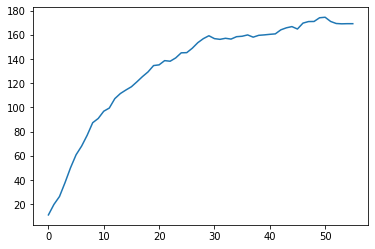

In [54]:
l = len(items)
p = 500
p_mut = 0.05
p_cross = 0.3

# arguments for fitness function (variable knapsack size)
fitness_func_args = {"knapsack_size": 103}

initial_pop = generate_random_bits(l, p)

pop, df = evolve(initial_pop, knapsack_fitness, p_cross, p_mut, fitness_func_args)

df["avg_fitness"].plot()

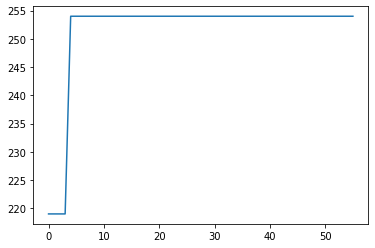

In [55]:
df["max_fitness"].plot()

Evolution 0, Average Fitness: 48.704, Fittest: 1111100000 (332), Change in avg fitness: 100%
Evolution 5, Average Fitness: 56.336, Fittest: 1111100000 (332), Change in avg fitness: 3.8044%
Evolution 10, Average Fitness: 75.686, Fittest: 1111100000 (332), Change in avg fitness: 5.7481%
Evolution 15, Average Fitness: 93.392, Fittest: 1111100000 (332), Change in avg fitness: 0.4774%
Evolution 20, Average Fitness: 107.978, Fittest: 1111100000 (332), Change in avg fitness: 0.1443%
Evolution 25, Average Fitness: 113.008, Fittest: 1111100000 (332), Change in avg fitness: 0.8476%
Evolution 30, Average Fitness: 122.234, Fittest: 1111100000 (332), Change in avg fitness: 0.5095%
Evolution 35, Average Fitness: 123.974, Fittest: 1111100000 (332), Change in avg fitness: 0.0919%
Evolution 40, Average Fitness: 114.4, Fittest: 1111100000 (332), Change in avg fitness: 5.0717%
Evolution 45, Average Fitness: 122.268, Fittest: 1111100000 (332), Change in avg fitness: 0.3245%
Evolution 50, Average Fitness: 

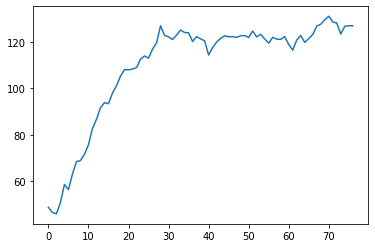

In [60]:
p = 500
p_mut = 0.05
p_cross = 0.3

fitness_func_args = {"knapsack_size": 156}

initial_pop = generate_random_bits(l, p)

pop, df = evolve(initial_pop, knapsack_fitness, p_cross, p_mut, fitness_func_args)

df["avg_fitness"].plot()

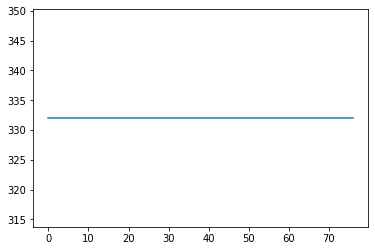

In [61]:
df["max_fitness"].plot()

##Part (b) Results

The results for running the algorithm for both sizes of knapsack are above. The data for both of these problems is much more noisy that the previous problems from part (a). This is probably due to the fitness function having a large difference between knapsacks that are actually very similar (in the case of the items being just overweight). When running the algorithm with an initial population of around 10000, the results for average fitness are a lot smoother. The max fitness graphs for both solutions don't display much. The first shows the jump up to the highest fitness on the second or third generation and the second found the fittest in the initial population. We chose to use 500 as the population as when a solution of 1000 is chosenit is highly probable that the optimal solution is one of the initial population. The reason being the solutions are 10 bits in length and with 2^10 or 1024 possible solutions using 1000 almost gauarantees finding the optimal solution on the first generation.